The Python code demonstrates various manifold learning techniques applied to a synthetic dataset representing points on a sphere. Manifold learning aims to uncover the underlying structure of high-dimensional data by embedding it into a lower-dimensional space while preserving certain properties.

This code generates a synthetic dataset, applies different manifold learning algorithms such as Locally Linear Embedding (LLE), Isomap, Multi-dimensional Scaling (MDS), Spectral Embedding, and t-distributed Stochastic Neighbor Embedding (t-SNE), and visualizes the results in 2D scatter plots.

It also measures and prints the time taken by each algorithm for computation.

standard: 0.055 sec
ltsa: 0.25 sec
hessian: 0.12 sec
modified: 0.095 sec
ISO: 0.17 sec


C:\Users\Suyash Tambe\AppData\Roaming\Python\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MDS: 1.6 sec
Spectral Embedding: 0.1 sec
t-SNE: 1.4 sec


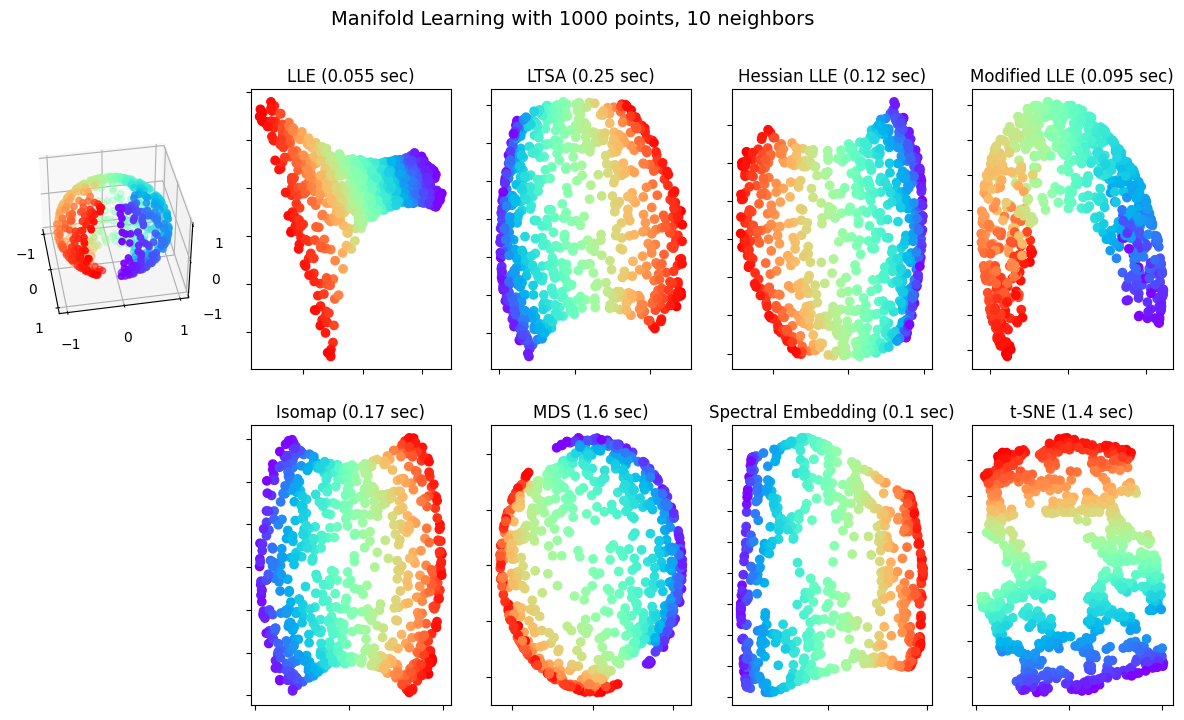

In [2]:
#libraries
from time import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn import manifold
from sklearn.utils import check_random_state


n_neighbors = 10
n_samples = 1000


random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi


indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

#  dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

# Visualizing the original 3D dataset
ax = fig.add_subplot(251, projection="3d")
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T


methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    # Transforming data using Locally Linear Embedding
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method, random_state=42
        )
        .fit_transform(sphere_data)
        .T
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))


    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    plt.axis("tight")

# Isomap Manifold learning.
t0 = time()

trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(sphere_data)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))

# transformed data
ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.axis("tight")

#  Multi-dimensional scaling.
t0 = time()

mds = manifold.MDS(2, max_iter=100, n_init=1, random_state=42)
trans_data = mds.fit_transform(sphere_data).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

# Plotting the transformed data
ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.axis("tight")

# Spectral Embedding.
t0 = time()

se = manifold.SpectralEmbedding(
    n_components=2, n_neighbors=n_neighbors, random_state=42
)
trans_data = se.fit_transform(sphere_data).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

# Plotting transformed data
ax = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.axis("tight")


t0 = time()
# Transforming data using t-SNE
tsne = manifold.TSNE(n_components=2, random_state=0)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))


ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.axis("tight")

plt.show()


**The original data has a spherical shape**. The first plot on the top left shows the data in three dimensions, with four distinct colors indicating the labels or classes of the points. The data has a spherical shape, which means it lies on a two-dimensional surface embedded in a three-dimensional space.

**The algorithms have different performance and speed**. Each plot is labeled with the name of the algorithm and the time it took to process the data. The plots show that some algorithms are faster than others, and some algorithms preserve the structure of the data better than others. For example, t-SNE is the slowest algorithm, but it also produces the most overlapping clusters. LLE, LTSA, Hessian LLE, and Modified LLE are similar algorithms, but they have different trade-offs between speed and accuracy. Isomap, MDS, and Spectral Embedding are faster algorithms, but they also distort the data more.

**Preservation of Global vs. Local Structure:**

MDS aims to preserve the global structure of the data, focusing on maintaining pairwise distances between points as closely as possible in the lower-dimensional space. It tries to represent the data in a way that maintains the overall structure.
t-SNE, on the other hand, emphasizes preserving local structure, particularly focusing on maintaining the neighborhood relationships between points. It tends to cluster similar points together in the lower-dimensional space.

**Parameter Sensitivity:**

MDS is less sensitive to its parameters, such as the number of dimensions or initialization, and tends to produce consistent results.
t-SNE's performance can be affected by its parameters, such as perplexity, learning rate, and number of iterations. Fine-tuning these parameters may be necessary to achieve optimal results.

**Distortion:**

MDS tends to produce less distortion in the embedding, meaning that the distances between points are more accurately preserved in the lower-dimensional space. However, it may not capture intricate local structures well.
t-SNE often creates more compact clusters and can reveal finer local structures, but it may distort the global distances between points.